# LightBGM

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
!git clone https://github.com/AdSh0102/PythonCogoport.git

Cloning into 'PythonCogoport'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), 2.15 MiB | 5.35 MiB/s, done.


In [ ]:
filePath = "/content/PythonCogoport/dataset.csv"
dataset = pd.read_csv(filePath)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Removing columns that are not needed


In [ ]:
columns_to_drop = ['Unnamed: 0', 'flight']
dataset = dataset.drop(columns=columns_to_drop)

## One Hot Encoding on all the categorical variables

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), dataset.select_dtypes(include='object').columns)], remainder='passthrough')
ct.fit(dataset)
X = ct.transform(dataset).toarray()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the LightBGM model on the Training set

In [ ]:
import lightgbm as lgb

regressor = lgb.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=31,  learning_rate=0.1,  n_estimators=100)
regressor.fit(X_train, y_train)

LGBMRegressor(objective='regression')

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[10752.11 10721.  ]
 [66841.29 66928.  ]
 [ 6877.36  6909.  ]
 ...
 [19586.32 20291.  ]
 [18117.23 18281.  ]
 [ 4003.77  3999.  ]]


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9998578382142336

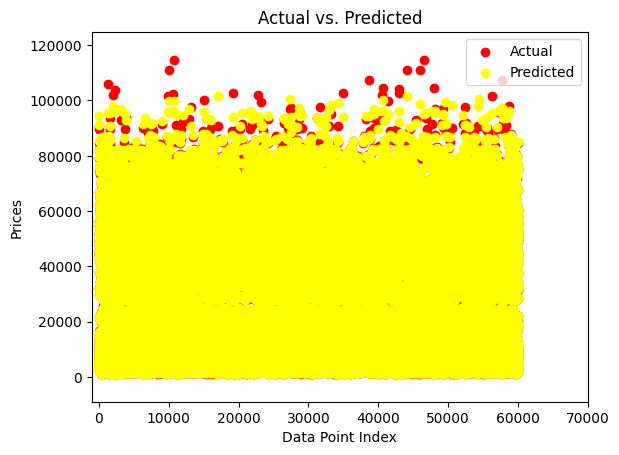

In [17]:
x_axis_range = [-1000, len(y_test)+10000 ]  # Change the range for the x-axis
y_axis_range = [min(min(y_test), min(y_pred)) - 10000, max(max(y_test), max(y_pred)) + 10000]  # Change the range for the y-axis

plt.scatter(range(1, len(y_test)+1), y_test, color='red', label='Actual')
plt.scatter(range(1, len(y_test)+1), y_pred, color='yellow', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Prices')
plt.title("Actual vs. Predicted")
plt.legend()

plt.xlim(x_axis_range)
plt.ylim(y_axis_range)

plt.show()